<a href="https://colab.research.google.com/github/swayam084/crime_dataset/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")


In [3]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM    2230.0   3.0   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     330.0   1.0   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM    1200.0   1.0   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM    1730.0  15.0   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     415.0  19.0   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest        377.0       2.0   624.0   
1      Central        163.0       2.0   624.0   
2      Central        155.0       2.0   845.0   
3  N Hollywood       1543.0       2.0   745.0   
4      Mission       1998.0       2.0   740.0   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [4]:
df.shape


(45354, 28)

In [5]:
df.describe().T.style.background_gradient(cmap = "coolwarm_r")


In [6]:
df.dtypes


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC          float64
AREA              float64
AREA NAME          object
Rpt Dist No       float64
Part 1-2          float64
Crm Cd            float64
Crm Cd Desc        object
Mocodes            object
Vict Age          float64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [7]:
df.info


<bound method DataFrame.info of            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0       10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM    2230.0   
1      190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     330.0   
2      200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM    1200.0   
3      191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM    1730.0   
4      191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     415.0   
...          ...                     ...                     ...       ...   
45349  200916935  11/07/2020 12:00:00 AM  11/05/2020 12:00:00 AM    1430.0   
45350  200913924  08/24/2020 12:00:00 AM  08/24/2020 12:00:00 AM     115.0   
45351  200111136  04/29/2020 12:00:00 AM  04/25/2020 12:00:00 AM     300.0   
45352  202010552  06/05/2020 12:00:00 AM  06/05/2020 12:00:00 AM      40.0   
45353  200111193            05/01/2020 1                     NaN       NaN   

       AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0       3.0    Southwest        377.0       2.0   624.0   
1       1.0      Central        163.0       2.0   624.0   
2       1.0      Central        155.0       2.0   845.0   
3      15.0  N Hollywood       1543.0       2.0   745.0   
4      19.0      Mission       1998.0       2.0   740.0   
...     ...          ...          ...       ...     ...   
45349   9.0     Van Nuys        939.0       2.0   930.0   
45350   9.0     Van Nuys        919.0       2.0   946.0   
45351   1.0      Central        185.0       1.0   330.0   
45352  20.0      Olympic       2016.0       2.0   626.0   
45353   NaN          NaN          NaN       NaN     NaN   

                                             Crm Cd Desc  ... Status  \
0                               BATTERY - SIMPLE ASSAULT  ...     AO   
1                               BATTERY - SIMPLE ASSAULT  ...     IC   
2              SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3               VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4      VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
...                                                  ...  ...    ...   
45349             CRIMINAL THREATS - NO WEAPON DISPLAYED  ...     AO   
45350                          OTHER MISCELLANEOUS CRIME  ...     IC   
45351                              BURGLARY FROM VEHICLE  ...     IC   
45352                  INTIMATE PARTNER - SIMPLE ASSAULT  ...     IC   
45353                                                NaN  ...    NaN   

        Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0       Adult Other    624.0      NaN       NaN      NaN   
1       Invest Cont    624.0      NaN       NaN      NaN   
2      Adult Arrest    845.0      NaN       NaN      NaN   
3       Invest Cont    745.0    998.0       NaN      NaN   
4       Invest Cont    740.0      NaN       NaN      NaN   
...             ...      ...      ...       ...      ...   
45349   Adult Other    930.0      NaN       NaN      NaN   
45350   Invest Cont    946.0    998.0       NaN      NaN   
45351   Invest Cont    330.0      NaN       NaN      NaN   
45352   Invest Cont    626.0      NaN       NaN      NaN   
45353           NaN      NaN      NaN       NaN      NaN   

                                       LOCATION Cross Street      LAT  \
0       1100 W  39TH                         PL          NaN  34.0141   
1        700 S  HILL                         ST          NaN  34.0459   
2        200 E  6TH                          ST          NaN  34.0448   
3       5400    CORTEEN                      PL          NaN  34.1685   
4      14400    TITUS                        ST          NaN  34.2198   
...                                         ...          ...      ...   
45349  13100    ALBERS                       ST          NaN  34.1703   
45350   6600    FULTON                       AV          NaN  34.1951   
45351                           900 S  BROADWAY          NaN  34.0423   
45352 

In [8]:
df.dtypes


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC          float64
AREA              float64
AREA NAME          object
Rpt Dist No       float64
Part 1-2          float64
Crm Cd            float64
Crm Cd Desc        object
Mocodes            object
Vict Age          float64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [12]:
#df.skew()


In [13]:
df.isnull().sum()


DR_NO                 0
Date Rptd             0
DATE OCC              1
TIME OCC              1
AREA                  1
AREA NAME             1
Rpt Dist No           1
Part 1-2              1
Crm Cd                1
Crm Cd Desc           1
Mocodes            6761
Vict Age              1
Vict Sex           6538
Vict Descent       6540
Premis Cd             1
Premis Desc          14
Weapon Used Cd    31557
Weapon Desc       31557
Status                1
Status Desc           1
Crm Cd 1              1
Crm Cd 2          42012
Crm Cd 3          45259
Crm Cd 4          45348
LOCATION              1
Cross Street      37281
LAT                   1
LON                   1
dtype: int64

In [14]:
df = df.drop(columns=['Mocodes','Crm Cd 3','Vict Sex','Date Rptd','DATE OCC','Premis Desc','LAT','Vict Descent','Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 4','Cross Street'], axis =0)


In [15]:
df.head()


DR_NO  TIME OCC  AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   10304468    2230.0   3.0    Southwest        377.0       2.0   624.0   
1  190101086     330.0   1.0      Central        163.0       2.0   624.0   
2  200110444    1200.0   1.0      Central        155.0       2.0   845.0   
3  191501505    1730.0  15.0  N Hollywood       1543.0       2.0   745.0   
4  191921269     415.0  19.0      Mission       1998.0       2.0   740.0   

                                         Crm Cd Desc  Vict Age  Premis Cd  \
0                           BATTERY - SIMPLE ASSAULT      36.0      501.0   
1                           BATTERY - SIMPLE ASSAULT      25.0      102.0   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE       0.0      726.0   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)      76.0      502.0   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...      31.0      409.0   

  Status   Status Desc  Crm Cd 1                                  LOCATION  \
0     AO   Adult Other     624.0   1100 W  39TH                         PL   
1     IC   Invest Cont     624.0    700 S  HILL                         ST   
2     AA  Adult Arrest     845.0    200 E  6TH                          ST   
3     IC   Invest Cont     745.0   5400    CORTEEN                      PL   
4     IC   Invest Cont     740.0  14400    TITUS                        ST   

        LON  
0 -118.2978  
1 -118.2545  
2 -118.2474  
3 -118.4019  
4 -118.4468

In [16]:
df = df.fillna(0)


In [17]:
df.isnull().sum()


DR_NO          0
TIME OCC       0
AREA           0
AREA NAME      0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Premis Cd      0
Status         0
Status Desc    0
Crm Cd 1       0
LOCATION       0
LON            0
dtype: int64

In [18]:
df.duplicated


<bound method DataFrame.duplicated of            DR_NO  TIME OCC  AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0       10304468    2230.0   3.0    Southwest        377.0       2.0   624.0   
1      190101086     330.0   1.0      Central        163.0       2.0   624.0   
2      200110444    1200.0   1.0      Central        155.0       2.0   845.0   
3      191501505    1730.0  15.0  N Hollywood       1543.0       2.0   745.0   
4      191921269     415.0  19.0      Mission       1998.0       2.0   740.0   
...          ...       ...   ...          ...          ...       ...     ...   
45349  200916935    1430.0   9.0     Van Nuys        939.0       2.0   930.0   
45350  200913924     115.0   9.0     Van Nuys        919.0       2.0   946.0   
45351  200111136     300.0   1.0      Central        185.0       1.0   330.0   
45352  202010552      40.0  20.0      Olympic       2016.0       2.0   626.0   
45353  200111193       0.0   0.0            0          0.0       0.0     0.0   

                                             Crm Cd Desc  Vict Age  Premis Cd  \
0                               BATTERY - SIMPLE ASSAULT      36.0      501.0   
1                               BATTERY - SIMPLE ASSAULT      25.0      102.0   
2              SEX OFFENDER REGISTRANT OUT OF COMPLIANCE       0.0      726.0   
3               VANDALISM - MISDEAMEANOR ($399 OR UNDER)      76.0      502.0   
4      VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...      31.0      409.0   
...                                                  ...       ...        ...   
45349             CRIMINAL THREATS - NO WEAPON DISPLAYED      32.0      501.0   
45350                          OTHER MISCELLANEOUS CRIME      39.0      502.0   
45351                              BURGLARY FROM VEHICLE      36.0      102.0   
45352                  INTIMATE PARTNER - SIMPLE ASSAULT      56.0      108.0   
45353                                                  0       0.0        0.0   

      Status   Status Desc  Crm Cd 1  \
0         AO   Adult Other     624.0   
1         IC   Invest Cont     624.0   
2         AA  Adult Arrest     845.0   
3         IC   Invest Cont     745.0   
4         IC   Invest Cont     740.0   
...      ...           ...       ...   
45349     AO   Adult Other     930.0   
45350     IC   Invest Cont     946.0   
45351     IC   Invest Cont     330.0   
45352     IC   Invest Cont     626.0   
45353      0             0       0.0   

                                       LOCATION       LON  
0       1100 W  39TH                         PL -118.2978  
1        700 S  HILL                         ST -118.2545  
2        200 E  6TH                          ST -118.2474  
3       5400    CORTEEN                      PL -118.4019  
4      14400    TITUS                        ST -118.4468  
...                                         ...       ...  
45349  13100    ALBERS                       ST -118.4189  
45350   6600    FULTON                       AV -118.4275  
45351                           900 S  BROADWAY -118.2561  
45352           6TH                          ST -118.2985  
45353                                         0    0.0000  

[45354 rows x 15 columns]>

In [19]:
df.drop_duplicates(keep='first', inplace=True)


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45354 entries, 0 to 45353
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        45354 non-null  int64  
 1   TIME OCC     45354 non-null  float64
 2   AREA         45354 non-null  float64
 3   AREA NAME    45354 non-null  object 
 4   Rpt Dist No  45354 non-null  float64
 5   Part 1-2     45354 non-null  float64
 6   Crm Cd       45354 non-null  float64
 7   Crm Cd Desc  45354 non-null  object 
 8   Vict Age     45354 non-null  float64
 9   Premis Cd    45354 non-null  float64
 10  Status       45354 non-null  object 
 11  Status Desc  45354 non-null  object 
 12  Crm Cd 1     45354 non-null  float64
 13  LOCATION     45354 non-null  object 
 14  LON          45354 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 5.2+ MB


In [21]:
df.columns


Index(['DR_NO', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Premis Cd', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LON'],
      dtype='object')

In [22]:
df.dtypes


DR_NO            int64
TIME OCC       float64
AREA           float64
AREA NAME       object
Rpt Dist No    float64
Part 1-2       float64
Crm Cd         float64
Crm Cd Desc     object
Vict Age       float64
Premis Cd      float64
Status          object
Status Desc     object
Crm Cd 1       float64
LOCATION        object
LON            float64
dtype: object

In [23]:
cat_var =['AREA NAME','Status','Status Desc','LOCATION','Crm Cd Desc']
df[cat_var]


AREA NAME Status   Status Desc  \
0        Southwest     AO   Adult Other   
1          Central     IC   Invest Cont   
2          Central     AA  Adult Arrest   
3      N Hollywood     IC   Invest Cont   
4          Mission     IC   Invest Cont   
...            ...    ...           ...   
45349     Van Nuys     AO   Adult Other   
45350     Van Nuys     IC   Invest Cont   
45351      Central     IC   Invest Cont   
45352      Olympic     IC   Invest Cont   
45353            0      0             0   

                                       LOCATION  \
0       1100 W  39TH                         PL   
1        700 S  HILL                         ST   
2        200 E  6TH                          ST   
3       5400    CORTEEN                      PL   
4      14400    TITUS                        ST   
...                                         ...   
45349  13100    ALBERS                       ST   
45350   6600    FULTON                       AV   
45351                           900 S  BROADWAY   
45352           6TH                          ST   
45353                                         0   

                                             Crm Cd Desc  
0                               BATTERY - SIMPLE ASSAULT  
1                               BATTERY - SIMPLE ASSAULT  
2              SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  
3               VANDALISM - MISDEAMEANOR ($399 OR UNDER)  
4      VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  
...                                                  ...  
45349             CRIMINAL THREATS - NO WEAPON DISPLAYED  
45350                          OTHER MISCELLANEOUS CRIME  
45351                              BURGLARY FROM VEHICLE  
45352                  INTIMATE PARTNER - SIMPLE ASSAULT  
45353                                                  0  

[45354 rows x 5 columns]

In [24]:
num_variable=df.drop(cat_var,axis=1)
num_variable

DR_NO  TIME OCC  AREA  Rpt Dist No  Part 1-2  Crm Cd  Vict Age  \
0       10304468    2230.0   3.0        377.0       2.0   624.0      36.0   
1      190101086     330.0   1.0        163.0       2.0   624.0      25.0   
2      200110444    1200.0   1.0        155.0       2.0   845.0       0.0   
3      191501505    1730.0  15.0       1543.0       2.0   745.0      76.0   
4      191921269     415.0  19.0       1998.0       2.0   740.0      31.0   
...          ...       ...   ...          ...       ...     ...       ...   
45349  200916935    1430.0   9.0        939.0       2.0   930.0      32.0   
45350  200913924     115.0   9.0        919.0       2.0   946.0      39.0   
45351  200111136     300.0   1.0        185.0       1.0   330.0      36.0   
45352  202010552      40.0  20.0       2016.0       2.0   626.0      56.0   
45353  200111193       0.0   0.0          0.0       0.0     0.0       0.0   

       Premis Cd  Crm Cd 1       LON  
0          501.0     624.0 -118.2978  
1          102.0     624.0 -118.2545  
2          726.0     845.0 -118.2474  
3          502.0     745.0 -118.4019  
4          409.0     740.0 -118.4468  
...          ...       ...       ...  
45349      501.0     930.0 -118.4189  
45350      502.0     946.0 -118.4275  
45351      102.0     330.0 -118.2561  
45352      108.0     626.0 -118.2985  
45353        0.0       0.0    0.0000  

[45354 rows x 10 columns]

In [25]:
df.head()


DR_NO  TIME OCC  AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   10304468    2230.0   3.0    Southwest        377.0       2.0   624.0   
1  190101086     330.0   1.0      Central        163.0       2.0   624.0   
2  200110444    1200.0   1.0      Central        155.0       2.0   845.0   
3  191501505    1730.0  15.0  N Hollywood       1543.0       2.0   745.0   
4  191921269     415.0  19.0      Mission       1998.0       2.0   740.0   

                                         Crm Cd Desc  Vict Age  Premis Cd  \
0                           BATTERY - SIMPLE ASSAULT      36.0      501.0   
1                           BATTERY - SIMPLE ASSAULT      25.0      102.0   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE       0.0      726.0   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)      76.0      502.0   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...      31.0      409.0   

  Status   Status Desc  Crm Cd 1                                  LOCATION  \
0     AO   Adult Other     624.0   1100 W  39TH                         PL   
1     IC   Invest Cont     624.0    700 S  HILL                         ST   
2     AA  Adult Arrest     845.0    200 E  6TH                          ST   
3     IC   Invest Cont     745.0   5400    CORTEEN                      PL   
4     IC   Invest Cont     740.0  14400    TITUS                        ST   

        LON  
0 -118.2978  
1 -118.2545  
2 -118.2474  
3 -118.4019  
4 -118.4468

In [26]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and cat_var is your list of categorical variables
for i in cat_var:
    fig = px.bar(df, x=i)
    fig.update_layout(
        width=800,  # Adjust the width of the figure
        height=600,  # Adjust the height of the figure
        xaxis_title=i,  # Set the x-axis title
        yaxis_title='Count',  # Set the y-axis title
        title=f'Count Plot of {i}',  # Set the title of the plot
        title_font_size=20  # Adjust the title font size
    )
    fig.update_xaxes(tickangle=-45)  # Rotate the x-axis labels for better readability
    fig.show()


In [39]:
import pandas as pd
import numpy as np

# Identify columns with numerical data
numeric_columns = df.select_dtypes(include=np.number).columns

# Convert only numerical columns to float32
df[numeric_columns] = df[numeric_columns].astype(np.float32)

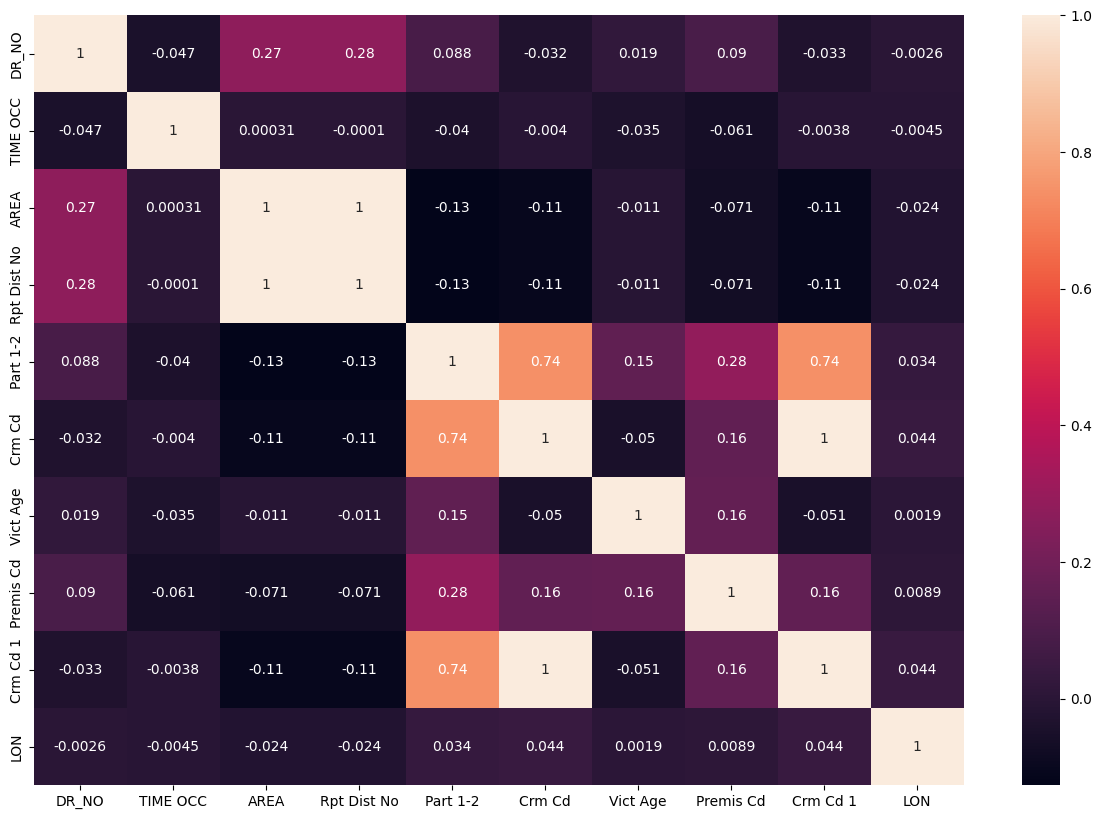

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identify columns with numerical data
numeric_columns = df.select_dtypes(include=np.number).columns

# Convert only numerical columns to float32
df[numeric_columns] = df[numeric_columns].astype(np.float32)

# Select only numeric columns for correlation calculation
df_numeric = df[numeric_columns]

plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

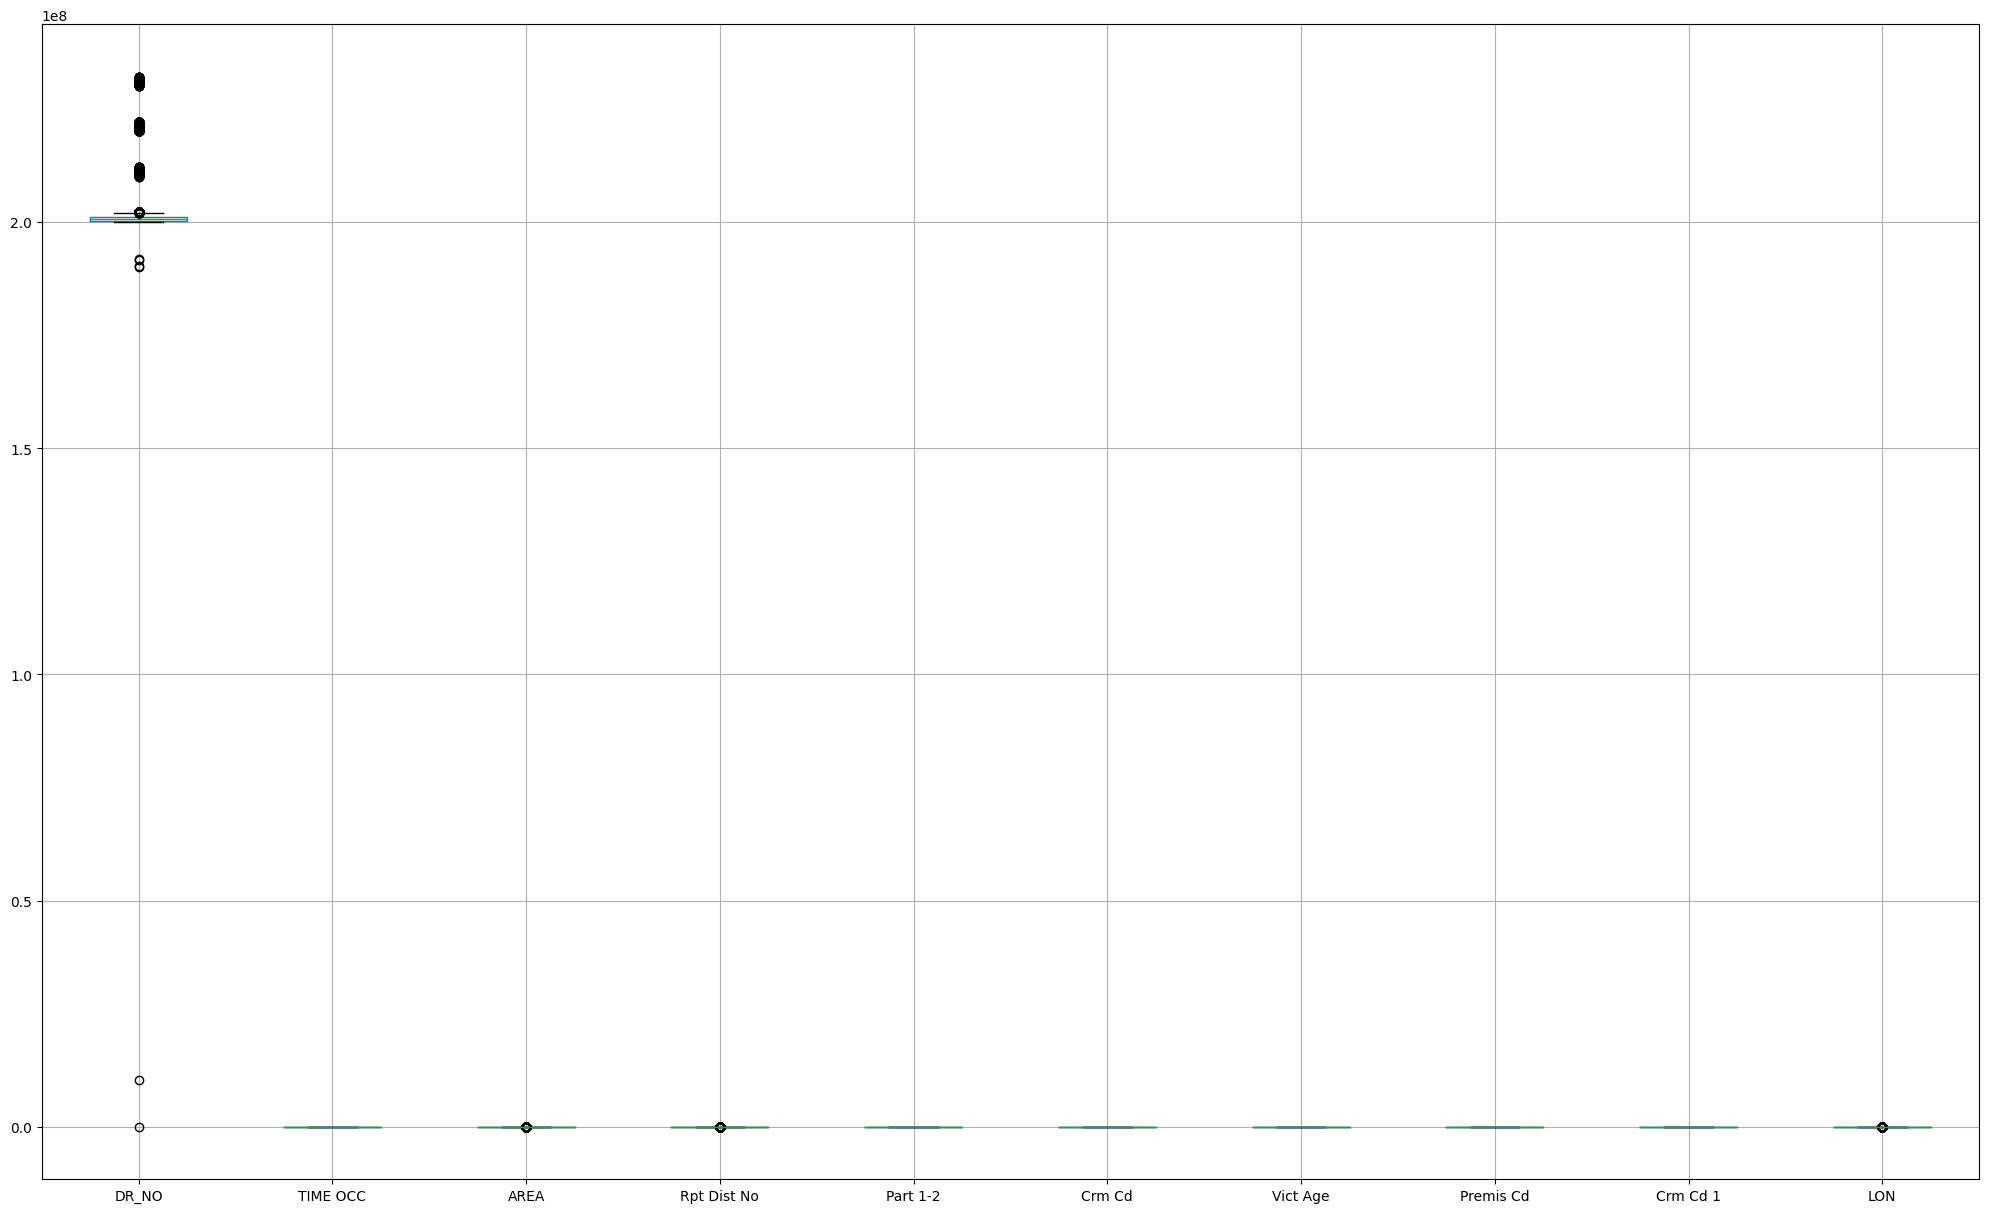

In [43]:
plt.figure(figsize=(25, 15))
df.boxplot()
plt.show()

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(cat_var)

for i in cat_var:
    # Check if the column contains both strings and numbers
    if df[i].apply(type).nunique() > 1:
        # Handle mixed data types (example: convert numbers to strings)
        df[i] = df[i].astype(str)

    df[i] = le.fit_transform(df[i])

df

['AREA NAME', 'Status', 'Status Desc', 'LOCATION', 'Crm Cd Desc']


DR_NO  TIME OCC  AREA  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0       10304468.0    2230.0   3.0         16        377.0       2.0   624.0   
1      190101088.0     330.0   1.0          2        163.0       2.0   624.0   
2      200110448.0    1200.0   1.0          2        155.0       2.0   845.0   
3      191501504.0    1730.0  15.0          9       1543.0       2.0   745.0   
4      191921264.0     415.0  19.0          8       1998.0       2.0   740.0   
...            ...       ...   ...        ...          ...       ...     ...   
45349  200916928.0    1430.0   9.0         18        939.0       2.0   930.0   
45350  200913920.0     115.0   9.0         18        919.0       2.0   946.0   
45351  200111136.0     300.0   1.0          2        185.0       1.0   330.0   
45352  202010560.0      40.0  20.0         12       2016.0       2.0   626.0   
45353  200111200.0       0.0   0.0          0          0.0       0.0     0.0   

       Crm Cd Desc  Vict Age  Premis Cd  Status  Status Desc  Crm Cd 1  \
0                5      36.0      501.0       2            2     624.0   
1                5      25.0      102.0       3            3     624.0   
2               82       0.0      726.0       1            1     845.0   
3              108      76.0      502.0       3            3     745.0   
4              107      31.0      409.0       3            3     740.0   
...            ...       ...        ...     ...          ...       ...   
45349           34      32.0      501.0       2            2     930.0   
45350           68      39.0      502.0       3            3     946.0   
45351           18      36.0      102.0       3            3     330.0   
45352           58      56.0      108.0       3            3     626.0   
45353            0       0.0        0.0       0            0       0.0   

       LOCATION         LON  
0          1357 -118.297798  
1         13834 -118.254501  
2          6101 -118.247398  
3         11922 -118.401901  
4          3451 -118.446800  
...         ...         ...  
45349      2724 -118.418900  
45350     13321 -118.427498  
45351     15424 -118.256104  
45352     13594 -118.298500  
45353         0    0.000000  

[45354 rows x 15 columns]

In [46]:
X = df.drop('Crm Cd Desc' ,axis =1)
Y =df['Crm Cd Desc']

In [48]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3, random_state=42)

In [49]:
clf = DecisionTreeClassifier()

In [50]:
clf.fit(X, Y)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
clf1.fit(X,Y)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = clf1.predict(X)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy = accuracy_score(Y, y_pred)

In [60]:
print("Accuracy:", accuracy)

Accuracy: 1.0


In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,y_pred)
r2

1.0